### Classification
Predicting a category or class for a given sample within a particular scenario, like first, second

### Regression
Predicting continuous values like temperatures, salaries

### Clustering
Identifying patterns in data to make clusters having similarities

##### In our case, we have to use classification to predict whether the breast tumor is benign or malignant. 
##### We are working with Breast Cancer Wisconsin (Original) dataset

###### The dataset is multivariate in having both, independent and dependent variables, 699 observations, 10 attributes

# Importing the libraries

In [34]:
import pandas as pd

# Importing the dataset

In [35]:
dataset = pd.read_csv(r"C:\Users\Anisha Ray\Downloads\Logistic_Regression\Final Folder\Dataset\breast_cancer.csv")
# Set of dependent variables and independent variables are created as x and y
X = dataset.drop(['Class'],axis='columns')
y = dataset['Class']
# Note: you cannot create X and y using dataframe functions if you're gonna operate on them later (Jupyter only)

In [42]:
X.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
dtype: int64

# Splitting the dataset into the training and test datasets

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

# Training the Logistic Regression model on the training set

In [37]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

# Predicting the Test Set Results

In [38]:
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[87  0]
 [50  0]]


Text(69.0, 0.5, 'Truth')

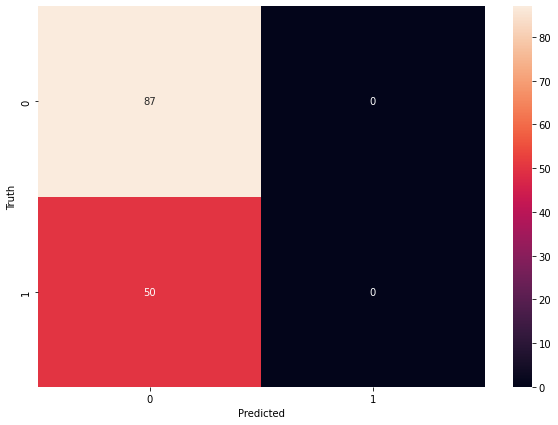

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Computing Accuracy with K-fold Cross Validation

In [41]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X= X_train, y=y_train, cv=10)
print("Accuracy= {:.2f}%".format(accuracies.mean()*100))

Accuracy= 65.38%
